In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Load the data from ‘horses.csv’ and observe whether it contains missing values

In [2]:
df = pd.read_csv("horse.csv")
df.isnull()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
5,False,False,False,True,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
7,False,False,False,True,False,True,False,True,True,False,...,False,False,True,True,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
9,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.head()
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

# Replace the missing values by the most frequent value in each column

In [4]:
df = df.fillna(df.mode().iloc[0])

# This dataset contains many categorical features, replace them with label encoding

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['surgery'])
le.classes_
df['surgery'] = le.transform(df['surgery']) 

le.fit(df['age'])
le.classes_
df['age'] = le.transform(df['age'])

le.fit(df['temp_of_extremities'])
le.classes_
df['temp_of_extremities'] = le.transform(df['temp_of_extremities'])

le.fit(df['peripheral_pulse'])
le.classes_
df['peripheral_pulse'] = le.transform(df['peripheral_pulse'])

le.fit(df['mucous_membrane'])
le.classes_
df['mucous_membrane'] = le.transform(df['mucous_membrane'])

le.fit(df['capillary_refill_time'])
le.classes_
df['capillary_refill_time'] = le.transform(df['capillary_refill_time'])

le.fit(df['pain'])
le.classes_
df['pain'] = le.transform(df['pain'])

le.fit(df['peristalsis'])
le.classes_
df['peristalsis'] = le.transform(df['peristalsis'])

le.fit(df['abdominal_distention'])
le.classes_
df['abdominal_distention'] = le.transform(df['abdominal_distention'])

le.fit(df['nasogastric_tube'])
le.classes_
df['nasogastric_tube'] = le.transform(df['nasogastric_tube'])

le.fit(df['nasogastric_reflux'])
le.classes_
df['nasogastric_reflux'] = le.transform(df['nasogastric_reflux'])

le.fit(df['rectal_exam_feces'])
le.classes_
df['rectal_exam_feces'] = le.transform(df['rectal_exam_feces'])

le.fit(df['abdomen'])
le.classes_
df['abdomen'] = le.transform(df['abdomen'])


le.fit(df['abdomo_appearance'])
le.classes_
df['abdomo_appearance'] = le.transform(df['abdomo_appearance'])

le.fit(df['abdomo_protein'])
le.classes_
df['abdomo_protein'] = le.transform(df['abdomo_protein'])

le.fit(df['outcome'])
le.classes_
df['outcome'] = le.transform(df['outcome'])

le.fit(df['surgical_lesion'])
le.classes_
df['surgical_lesion'] = le.transform(df['surgical_lesion'])

le.fit(df['cp_data'])
le.classes_
df['cp_data'] = le.transform(df['cp_data'])

df = df.drop(['lesion_2', 'lesion_3'], axis=1)

df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,1,0,45.0,8.4,1,6,0,0,11300,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,0,4,50.0,85.0,1,6,1,0,2208,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,3,3,33.0,6.7,1,6,2,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,1,0,48.0,7.2,2,29,0,1,2208,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,0,0,74.0,7.4,1,6,0,0,4300,0


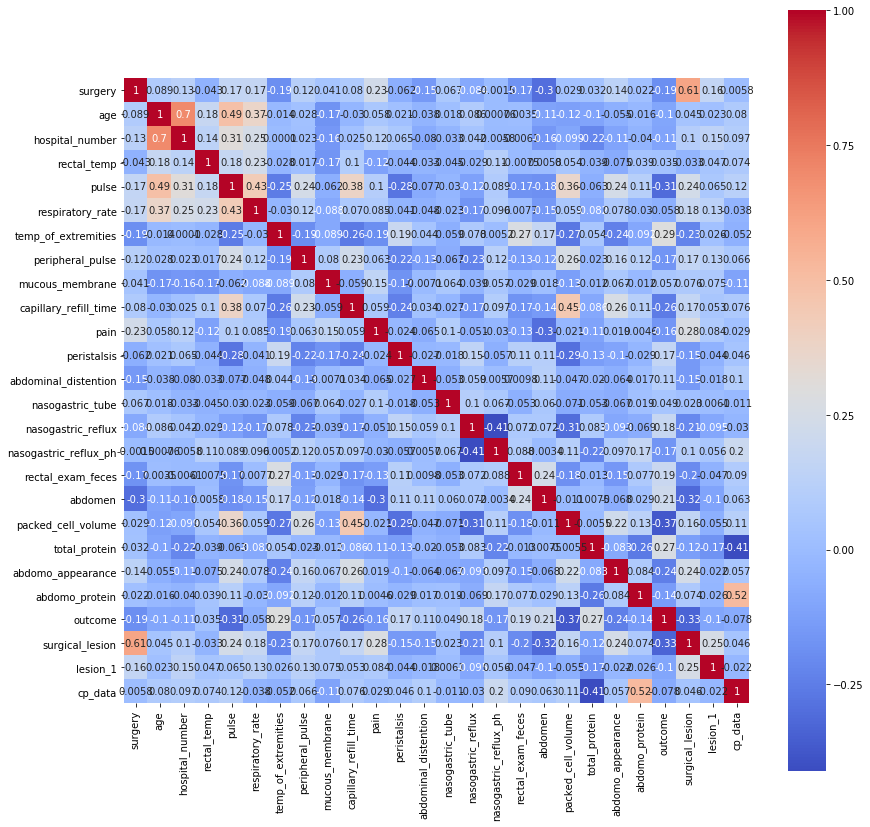

In [6]:
#check for co-relation
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, annot=True, square = True, cmap = 'coolwarm')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

prediction_features =['surgery', 'age', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'cp_data']

train, test = train_test_split(df, test_size = 0.20)
#we can check the dimension of splitted data
print(train.shape)
print(test.shape)

train_x = train[prediction_features]
train_y = train.outcome

test_x = test[prediction_features]
test_y = test.outcome

(239, 26)
(60, 26)


# Fit a decision tree classifier and observe the accuracy

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=4)
clf.fit(train_x,train_y,sample_weight=None, check_input=True, X_idx_sorted=None)
pred_y = clf.predict(test_x,check_input=True)
#calculate accuracy
calc_accuracy = metrics.accuracy_score(pred_y,test_y)
print("Accuracy of model::", calc_accuracy)

Accuracy of model:: 0.7166666666666667


# Fit a random forest classifier and observe the accuracy

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_x,train_y)
pred_y = rfc.predict(test_x)
#calculate accuracy
calc_accuracy = metrics.accuracy_score(pred_y,test_y)
print("Accuracy of model::", calc_accuracy)

Accuracy of model:: 0.6833333333333333
